In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from regressors import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 1. (b) Exploring the data:

In [2]:
colnames = ['T', 'V', 'AP', 'RH', 'EP']
data = pd.read_excel('Folds5x2_pp.xlsx',names = colnames)
data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print('Total columns: ', len(data.columns), ' ,Total rows: ', data['AP'].count())

Total columns:  5  ,Total rows:  9568


# Ans: Total columns:  5  ,Total rows:  9568

# First four columns : Independent Variables
# Last columns : Dependent Variable
# Rows: Data points recorded from Combined Cycle Power Plant during 2006-2011


# ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

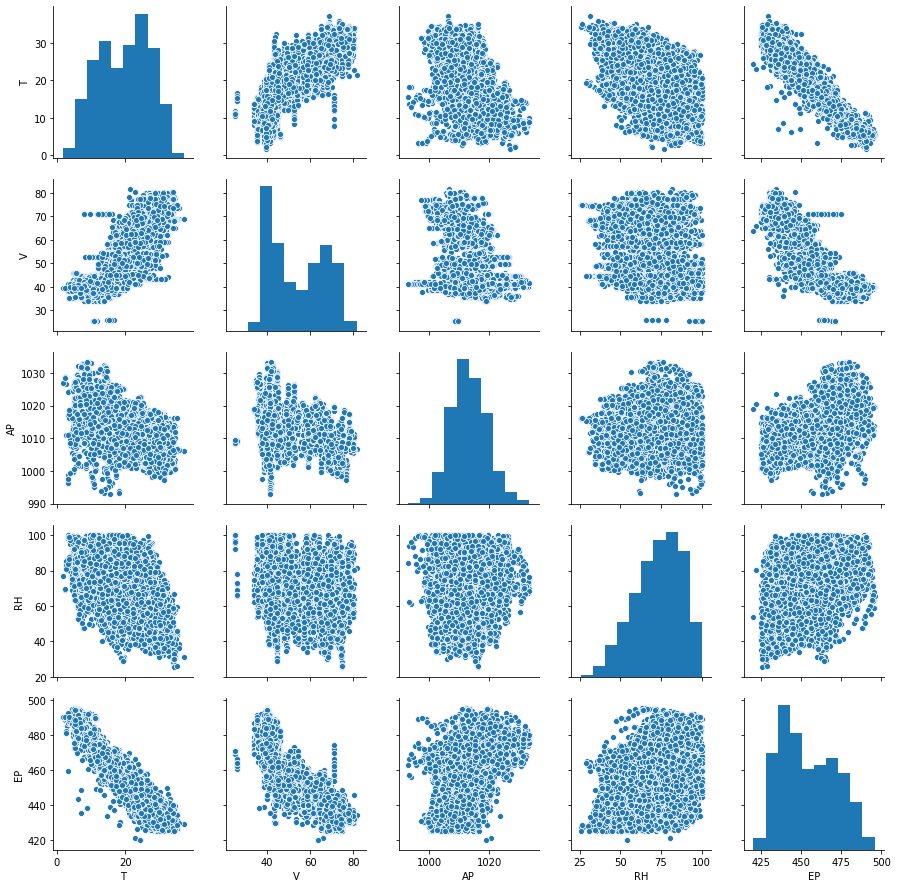

In [4]:
g = sns.pairplot(data)

# iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
perccentile_dict_list = []

t_quartiles = np.percentile(data['T'], [25, 50, 75])
aP_quartiles = np.percentile(data['AP'], [25, 50, 75])
v_quartiles = np.percentile(data['V'], [25, 50, 75])
rH_quartiles = np.percentile(data['RH'], [25, 50, 75])
eP_quartiles = np.percentile(data['EP'], [25, 50, 75])
variable_ranges = (data.max() - data.min())

perccentile_dict_list.append({'variable': 'T',
                              'first quartiles': t_quartiles[0],
                              'median': data['T'].median(),
                              'mean': data['T'].mean(),
                              'third quartiles': t_quartiles[2],
                              'interquartile range': t_quartiles[2] - t_quartiles[0],
                              'range': variable_ranges.get('T')
                             })

perccentile_dict_list.append({'variable': 'AP',
                              'first quartiles': aP_quartiles[0],
                              'median': data['AP'].median(),
                              'mean': data['AP'].mean(),
                              'third quartiles': aP_quartiles[2],
                              'interquartile range': aP_quartiles[2] - aP_quartiles[0],
                              'range': variable_ranges.get('AP')
                             })

perccentile_dict_list.append({'variable': 'V',
                              'first quartiles': v_quartiles[0],
                              'median': data['V'].median(),
                              'mean': data['V'].mean(),
                              'third quartiles': v_quartiles[2],
                              'interquartile range': v_quartiles[2] - v_quartiles[0],
                              'range': variable_ranges.get('V')
                             })

perccentile_dict_list.append({'variable': 'RH',
                              'first quartiles': rH_quartiles[0],
                              'median': data['RH'].median(),
                              'mean': data['RH'].mean(),
                              'third quartiles': rH_quartiles[2],
                              'interquartile range': rH_quartiles[2] - rH_quartiles[0],
                              'range': variable_ranges.get('RH')
                             })

perccentile_dict_list.append({'variable': 'EP',
                              'first quartiles': eP_quartiles[0],
                              'median': data['EP'].median(),
                              'mean': data['EP'].mean(),
                              'third quartiles': eP_quartiles[2],
                              'interquartile range': eP_quartiles[2] - eP_quartiles[0],
                              'range': variable_ranges.get('EP')
                             })

pd.DataFrame.from_dict(perccentile_dict_list)




,first quartiles,interquartile range,mean,median,range,third quartiles,variable
0,13.5100,12.2100,19.651231,20.345,35.30,25.72,T
1,1009.1000,8.1600,1013.259078,1012.940,40.41,1017.26,AP
2,41.7400,24.8000,54.305804,52.080,56.20,66.54,V
3,63.3275,21.5025,73.308978,74.975,74.60,84.83,RH
4,439.7500,28.6800,454.365009,451.550,75.50,468.43,EP


# (c) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Summary of T:
Residuals:
     Min     1Q  Median      3Q      Max
-23.2512 -3.696 -0.1009  3.6436  45.9509


Coefficients:
             Estimate  Std. Error    t value  p value
_intercept  497.03412    0.156268  3180.6524      0.0
x1           -2.17132    0.002941  -738.3933      0.0
---
R-squared:  0.89895,    Adjusted R-squared:  0.89894
F-statistic: 85097.76 on 1 features
Summary of V:
Residuals:
     Min    1Q  Median     3Q      Max
-39.9596 -5.42  0.0726  5.314  37.0276


Coefficients:
              Estimate  Std. Error    t value  p value
_intercept  517.801526    0.377801  1370.5685      0.0
x1           -1.168135    0.001658  -704.5223      0.0
---
R-squared:  0.75652,    Adjusted R-squared:  0.75649
F-statistic: 29722.29 on 1 features
Summary of AP:
Residuals:
    Min      1Q  Median       3Q      Max
-60.252 -9.8014  3.0086  11.1143  43.7469


Coefficients:
               Estimate  Std. Error   t value  p value
_intercept -1055.260989   25.456818   -41.453      0.0
x1       

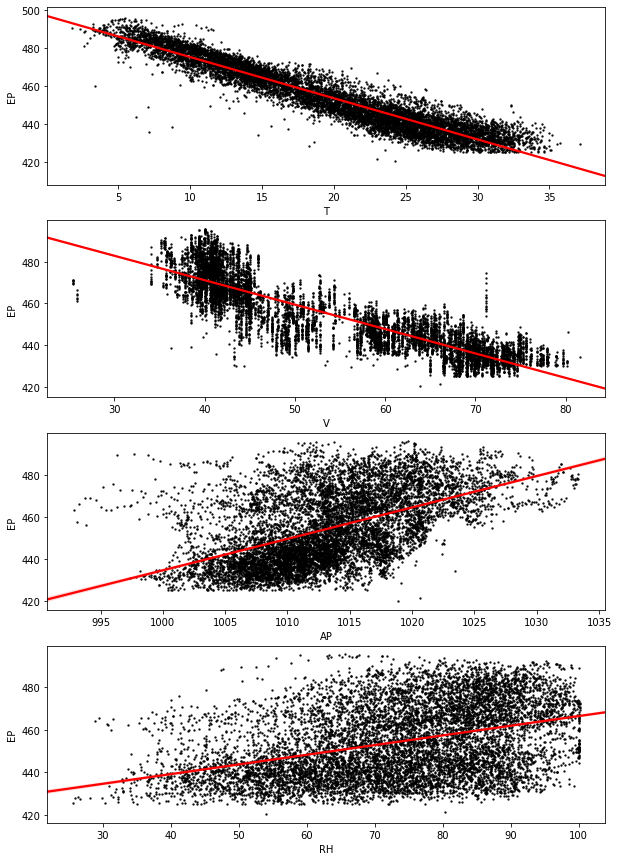

In [6]:
variables_list = ['T', 'V', 'AP', 'RH']
single_coef_list = []

# i = 0
subplot = 1
plt.figure(figsize=(10,15))

for variable in variables_list:

    x = data[variable].values
    x = x.reshape(x.shape[0], 1)
    y = data['EP'].values
    y = y.reshape(y.shape[0], 1)
    
    lr = LinearRegression()
    lr.fit(x,y)
    single_coef_list.append({'variable':variable, 'single coefficients': lr.coef_[0][0]})
    
    print('Summary of %s:'%variable)
    stats.summary(lr, x, y)
    print('=======================================================')
    
    plt.subplot(4,1, subplot)
    sns.regplot(x= variable, y="EP", data=data,
                  scatter_kws={"color": "black",'s':2}, line_kws={"color": "red"})
    subplot += 1
#     i += 1
    
   

# Ans: All Variable: T, V, RH, AP are statistically signiﬁcant association between the predictor and the response, because they all have very little P-Value < 0.05.

# Ans: The outliers I marked in flowing plots should be removed according to their high residual value

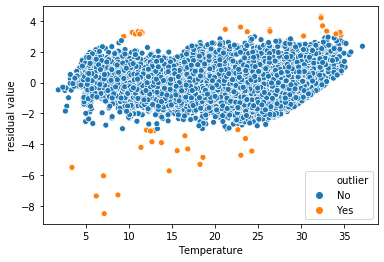

In [7]:
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
# import statsmodels.stats as stats

x = data['T']
x = sm.add_constant(x)
y = data['EP']

rgs = sm.OLS(y, x).fit()
rgs.summary()

ifl = rgs.get_influence() 
ext_standard_residual = ifl.resid_studentized_external
residual_catagory = list(map(lambda x: 'Yes' if (x > 3) | (x < -3) else 'No', ext_standard_residual))

t_res_diclist = {'Temperature': data['T'] , 'residual value': ext_standard_residual, 'outlier': residual_catagory }
t_res_dataset = pd.DataFrame(t_res_diclist)
# t_res_dataset.head()

t_outlier_plot = sns.scatterplot(y="residual value", x="Temperature", hue='outlier', data=t_res_dataset)

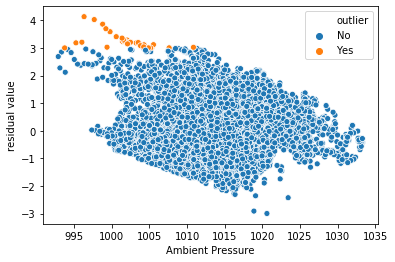

In [8]:
x = data['AP']
x = sm.add_constant(x)
y = data['EP']

rgs = sm.OLS(y, x).fit()
rgs.summary()

ifl = rgs.get_influence() 
ext_standard_residual = ifl.resid_studentized_external
residual_catagory = list(map(lambda x: 'Yes' if (x > 3) | (x < -3) else 'No', ext_standard_residual))

t_res_diclist = {'Ambient Pressure': data['AP'] , 'residual value': ext_standard_residual, 'outlier': residual_catagory }
t_res_dataset = pd.DataFrame(t_res_diclist)
t_res_dataset.head()

t_outlier_plot = sns.scatterplot(y="residual value", x="Ambient Pressure", hue='outlier', data=t_res_dataset)

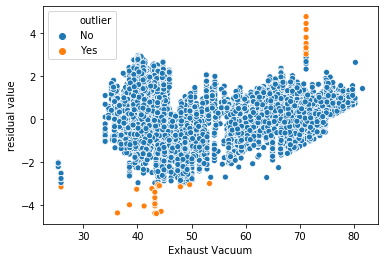

In [9]:
x = data['V']
x = sm.add_constant(x)
y = data['EP']

rgs = sm.OLS(y, x).fit()
rgs.summary()

ifl = rgs.get_influence() 
ext_standard_residual = ifl.resid_studentized_external
residual_catagory = list(map(lambda x: 'Yes' if (x > 3) | (x < -3) else 'No', ext_standard_residual))

t_res_diclist = {'Exhaust Vacuum': data['V'] , 'residual value': ext_standard_residual, 'outlier': residual_catagory }
t_res_dataset = pd.DataFrame(t_res_diclist)
t_res_dataset.head()

t_outlier_plot = sns.scatterplot(y="residual value", x="Exhaust Vacuum", hue='outlier', data=t_res_dataset)

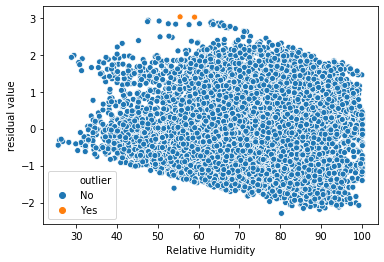

In [10]:
x = data['RH']
x = sm.add_constant(x)
y = data['EP']

rgs = sm.OLS(y, x).fit()
rgs.summary()

ifl = rgs.get_influence() 
ext_standard_residual = ifl.resid_studentized_external
residual_catagory = list(map(lambda x: 'Yes' if (x > 3) | (x < -3) else 'No', ext_standard_residual))

t_res_diclist = {'Relative Humidity': data['RH'] , 'residual value': ext_standard_residual, 'outlier': residual_catagory }
t_res_dataset = pd.DataFrame(t_res_diclist)
t_res_dataset.head()

t_outlier_plot = sns.scatterplot(y="residual value", x="Relative Humidity", hue='outlier', data=t_res_dataset)

<font size = 5>(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?</font>

In [11]:
multi_coef_list = []

j = 0
x = data.iloc[:,0:4]
y = data['EP']
lrg = LinearRegression()
lrg.fit(x,y)

for variable in variables_list:
    multi_coef_list.append({'variable':variable, 'multiple coefficients': lrg.coef_[j]})
    j += 1

stats.summary(lrg, x, y)

Residuals:
     Min      1Q  Median     3Q      Max
-17.7777 -3.2008  0.1177  3.166  43.4354


Coefficients:
              Estimate  Std. Error   t value  p value
_intercept  454.609274    9.745958   46.6459      0.0
x1           -1.977513    0.012978 -152.3777      0.0
x2           -0.233916    0.005588  -41.8605      0.0
x3            0.062083    0.000088  702.9612      0.0
x4           -0.158054    0.003557  -44.4405      0.0
---
R-squared:  0.92870,    Adjusted R-squared:  0.92867
F-statistic: 31138.27 on 4 features


# Ans: we can reject the null hypothesis on all the predictors, because all of their p-values are less then 0.05

<font size = 5> (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis. </font>

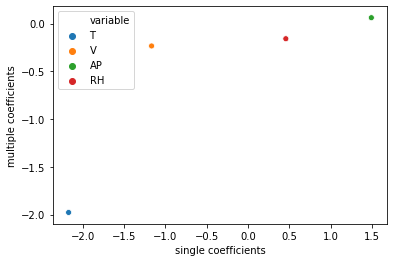

In [12]:
multi_coef_dataset = pd.DataFrame(multi_coef_list)
single_coef_dataset = pd.DataFrame(single_coef_list)
# print(multi_coef_dataset,single_coef_dataset)
# coef_dataset
coef_dataset=  pd.concat([multi_coef_dataset, single_coef_dataset], axis=1, sort=True, join = 'outer').iloc[:,:3]
coef_plot = sns.scatterplot(y="multiple coefficients", x="single coefficients", hue='variable', data=coef_dataset)

<font size = 5> (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form1


# Temperature:

In [13]:
f = 'EP ~ T + I(T**2) + I(T**3)'
mdl = smf.ols(formula=f, data=data).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
T             -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(T ** 2)     -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(T ** 3)      0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ans: Since P-Values are all less than 0.05 so they have nonlinear association

# Exhaust Vacuum

In [14]:
f = 'EP ~ V + I(V**2) + I (V**3)'
mdl = smf.ols(formula=f, data=data).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(V ** 2)     -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(V ** 3)      0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ans: Even that the P-Value of I(V ** 2) is more than 0.05 but I(V ** 3) has a little P-Value less than 0.05 so they have nonlinear association

# Ambient Pressure

In [15]:
f = 'EP ~ AP + I(AP**2) + I (AP**3)'
mdl = smf.ols(formula=f, data=data).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
I(AP ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(AP ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ans: Since P-Values are all less than 0.05 so they have nonlinear association

# Relative Humidity

In [16]:
f = 'EP ~ RH + I(RH**2) + I (RH**3)'
mdl = smf.ols(formula=f, data=data).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(RH ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(RH ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ans: Since P-Values are all less than 0.05 so they have nonlinear association

<font size = 5>(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [17]:
f = 'EP ~ T + V + AP + RH + T * V + T * AP + T * RH + V * AP + V * RH + AP * RH'
mdl = smf.ols(formula = f, data = data).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
T             -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
T:V            0.0210      0.001     23.338      0.000       0.019       0.023
T:AP           0.0018      0.002      0.752      0.452      -0.003       0.006
T:RH          -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size = 5> (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors.

In [18]:
mse_list = []

x = data[['T', 'V', 'AP', 'RH']]
y = data['EP']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 20)
lrg = LinearRegression()
lrg.fit(x_train, y_train)

y_train_pred = lrg.predict(x_train)
y_test_pred = lrg.predict(x_test)

train_MSE = metrics.mean_squared_error(y_train, y_train_pred)
test_MSE = metrics.mean_squared_error(y_test, y_test_pred)

mse_list.append({'Model':'Multiple Linear Regression Model',
                'MSE(Train)': train_MSE,
                'MSE(Test)' : test_MSE})

print('Multiple Linear Regression Model: ')
print('MSE(Train):', train_MSE)
print('MSE(Test):', test_MSE)

Multiple Linear Regression Model: 
MSE(Train): 20.19776821104716
MSE(Test): 22.107290402881848


<font size = 5> Also, run a regression model involving all possible interaction terms and quadratic nonlinearities

In [19]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 20)

f = 'EP ~ T + V + AP + RH + (T * V) + (T * AP) + (T * RH) + (V * AP) + (V * RH) + (AP * RH) + I(T**2) + I(V**2) + I(AP**2) + I(RH**2)'
model = smf.ols(formula = f, data=data_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7348.
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:45   Log-Likelihood:                -19118.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6682   BIC:                         3.837e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7216.0547   1451.826     -4.970      0.000   -1.01e+04   -4370.012
T             -6.4441      3.653     -1.764      0.078     -13.606       0.718
V             -2.7431      1.776     -1.545      0.122      -6.224       0.737
AP            15.1146      2.815      5.369      0.000       9.596      20.633
RH             3.1825      1.036      3.073      0.002       1.153       5.212
T:V            0.0134      0.003      4.136      0.000       0.007       0.020
T:AP           0.0037      0.004      1.051      0.293      -0.003       0.011
T:RH          -0.0061      0.002     -3.468      0.001      -0.010      -0.003
V:AP           0.0023      0.002      1.322      0.186      -0.001       0.006
V:RH           0.0007      0.001      0.936      0.349      -0.001       0.002
AP:RH         -0.0029      0.001     -2.902      0.004      -0.005      -0.001
I(T ** 2)      0.0147      0.004      3.978      0.000       0.007       0.022
I(V ** 2)     -0.0017      0.001     -1.864      0.062      -0.004    9.06e-05
I(AP ** 2)    -0.0074      0.001     -5.410      0.000      -0.010      -0.005
I(RH ** 2)    -0.0019      0.000     -6.186      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      800.077   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3837.686
Skew:                          -0.487   Prob(JB):                         0.00
Kurtosis:                       6.578   Cond. No.                     2.91e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size= 5>Remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

# I choose to remove insignificant variables which has P value > 0.25, they are: T(0.078), V(0.122), T＊AP(0.293), V＊AP(0.186), V＊RH(0.349), V^2(0.062)	

In [20]:
f = 'EP ~ AP + RH + (T * V) + (T * RH) + (AP * RH) + I(T**2) + I(AP**2) + I(RH**2)'
model = smf.ols(formula = f, data=data_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.027e+04
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:21:46   Log-Likelihood:                -19126.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6686   BIC:                         3.835e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.024e+04   1104.985     -9.267      0.000   -1.24e+04   -8074.315
AP            20.7698      2.184      9.512      0.000      16.489      25.050
RH             4.8994      0.762      6.429      0.000       3.405       6.393
T             -2.4347      0.100    -24.279      0.000      -2.631      -2.238
V             -0.4486      0.032    -14.105      0.000      -0.511      -0.386
T:V            0.0075      0.001      5.154      0.000       0.005       0.010
T:RH          -0.0063      0.001     -7.306      0.000      -0.008      -0.005
AP:RH         -0.0045      0.001     -6.180      0.000      -0.006      -0.003
I(T ** 2)      0.0172      0.002      7.558      0.000       0.013       0.022
I(AP ** 2)    -0.0100      0.001     -9.292      0.000      -0.012      -0.008
I(RH ** 2)    -0.0020      0.000     -7.242      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      801.637   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3721.493
Skew:                          -0.499   Prob(JB):                         0.00
Kurtosis:                       6.513   Cond. No.                     2.21e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
y_train_pred = model.predict(data_train)
y_test_pred = model.predict(data_test)

train_MSE = metrics.mean_squared_error(y_train, y_train_pred)
test_MSE = metrics.mean_squared_error(y_test, y_test_pred)

mse_list.append({'Model':'Linear Regression without insignificant variables',
                'MSE(Train)': train_MSE,
                'MSE(Test)' : test_MSE})

print('Linear Regression with insignificant variables removal:')
print('MSE(Train):', train_MSE)
print('MSE(Test):', test_MSE)

Linear Regression with insignificant variables removal:
MSE(Train): 17.707618091133515
MSE(Test): 19.178194297568897


<font size = 5>KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

# Knn with Raw Feature

In [22]:
k_values = list(range(1,101))

mse_knn_train_dic = []
mse_knn_test_dic= []
mse_knn_train_list = []
mse_knn_test_list= []

for k in k_values:
    clf = neighbors.KNeighborsRegressor(n_neighbors = k)
    clf.fit(x_train, y_train)
    train_y_predict = clf.predict(x_train)
    test_y_predict = clf.predict(x_test)
    mse_knn_train_dic.append({'type' : 'Train','1/k' : 1/k,'MSE':metrics.mean_squared_error(y_train, train_y_predict)})
    mse_knn_test_dic.append({'type' : 'Test','1/k' : 1/k,'MSE':metrics.mean_squared_error(y_test, test_y_predict)})
    mse_knn_train_list.append(metrics.mean_squared_error(y_train, train_y_predict))
    mse_knn_test_list.append(metrics.mean_squared_error(y_test, test_y_predict))
    
mse_list.append({'Model':'KNN Regression with raw data',
                'MSE(Train)': min(mse_knn_train_list),
                'MSE(Test)' : min(mse_knn_test_list)})
    
print('KNN Regression with raw data:')
print('MSE (Train):', min(mse_knn_train_list))
print('MSE (Test):', min(mse_knn_test_list))


KNN Regression with raw data:
MSE (Train): 0.0
MSE (Test): 16.92631893138279


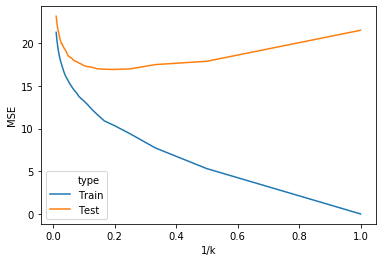

In [23]:
mse_rawKnn_data_train = pd.DataFrame(mse_knn_train_dic)
mse_rawKnn_data_test = pd.DataFrame(mse_knn_test_dic)
mse_rawKnn_data_set = mse_rawKnn_data_train.append(mse_rawKnn_data_test)
error_rate_plot = sns.lineplot(y="MSE", x="1/k", hue='type', data=mse_rawKnn_data_set)

# Knn with Normalized Feature

In [24]:
no_data = data[['T', 'V', 'AP', 'RH']]
x = no_data.values
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
no_data = pd.DataFrame(x_scaled)
no_data.columns = ['T', 'V', 'AP', 'RH']
no_data.head()

,T,V,AP,RH
0,0.372521,0.291815,0.771591,0.638204
1,0.662040,0.669039,0.671863,0.449330
2,0.093484,0.249822,0.476862,0.892493
3,0.539660,0.568683,0.429349,0.684718
4,0.255241,0.216014,0.404355,0.952547


In [25]:
k_values = list(range(1,101))
x = no_data[['T', 'V', 'AP', 'RH']]
y = data['EP']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 20)
mse_noknn_train_dic = []
mse_noknn_test_dic= []
mse_noknn_train_list = []
mse_noknn_test_list= []

for k in k_values:
    clf = neighbors.KNeighborsRegressor(n_neighbors = k)
    clf.fit(x_train, y_train)
    train_y_predict = clf.predict(x_train)
    test_y_predict = clf.predict(x_test)
    mse_noknn_train_dic.append({'type' : 'Train','1/k' : 1/k,'MSE':metrics.mean_squared_error(y_train, train_y_predict)})
    mse_noknn_test_dic.append({'type' : 'Test','1/k' : 1/k,'MSE':metrics.mean_squared_error(y_test, test_y_predict)})
    mse_noknn_train_list.append(metrics.mean_squared_error(y_train, train_y_predict))
    mse_noknn_test_list.append(metrics.mean_squared_error(y_test, test_y_predict))

mse_list.append({'Model':'KNN Regression with normalized data',
                'MSE(Train)': min(mse_noknn_train_list),
                'MSE(Test)' : min(mse_noknn_test_list)})
    
print('KNN Regression with normalized data:')
print('MSE (Train):', min(mse_noknn_train_list))
print('MSE (Test):', min(mse_noknn_test_list))

KNN Regression with normalized data:
MSE (Train): 0.0
MSE (Test): 15.26664124288866


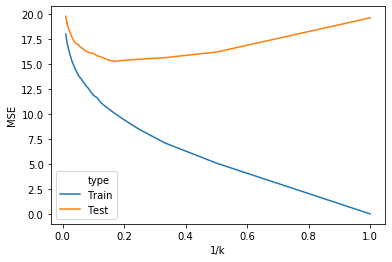

In [26]:
mse_noKnn_data_train = pd.DataFrame(mse_noknn_train_dic)
mse_noKnn_data_test = pd.DataFrame(mse_noknn_test_dic)
mse_noKnn_data_set = mse_noKnn_data_train.append(mse_noKnn_data_test)
error_rate_plot = sns.lineplot(y="MSE", x="1/k", hue='type', data=mse_noKnn_data_set)

In [27]:
pd.DataFrame.from_dict(mse_list)

,MSE(Test),MSE(Train),Model
0,22.107290,20.197768,Multiple Linear Regression Model
1,19.178194,17.707618,Linear Regression without insignificant variables
2,16.926319,0.000000,KNN Regression with raw data
3,15.266641,0.000000,KNN Regression with normalized data


<font size = 10> ISLR: 2.4.1

<font size = 4>(a) The sample size n is extremely large, and the number of predictors p is small.

Ans: I think the flexible methods will fit the data closer with the large sample size.

(b) The number of predictors p is extremely large, and the number of observations n is small.

Ans: Flexible methods will overfit the small number of observations, so inflexible methods will be better.

(c) Model:The relationship between the predictors and response is highly non-linear.
Ans: In my opinion, flexible methods will fit better with more freedom.

(d) Model:The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
Ans: Inflexible methods will be better because flexible methods will fit to the noise in the error terms and increase variance.</font>

<font size = 10> ISLR: 2.4.7

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

Ans: Euclidean distance of
Obs1 = 3, 
Obs2 = 2, 
Obs3 = 10^1/2 = 3.162, 
Obs4 = 5^1/2 = 2.236,
Obs5 = 2^1/2 = 1.414, 
Obs6 = 3^1/2 = 1.732

(b) What is our prediction with K = 1? Why?

Ans: Our prediction with K = 1 is Green, because distance from Obs5 = 2^1/2 is the smallest and the color of it is Green.

(c) What is our prediction with K = 3? Why?

Ans: Our prediction with K = 3 is Red, because distance from Obs5, Obs2 and Obs6 are the three smallest and the color of them are Green, Red and Red.

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

Ans: We would expect the best value for K to be small, because when K becomes larger, the boundary becomes inflexible.